In [38]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("games-features.csv")

In [3]:
df.shape

(13357, 78)

,PurchaseAvail,PriceFinal
0,True,9.99
1,True,4.99
2,True,4.99
3,True,4.99
4,True,4.99
5,True,4.99
6,True,9.99
7,True,9.99
8,True,9.99
9,True,4.99


In [4]:
len(df.columns)

78

In [5]:
df.isnull().sum()

QueryID                        0
ResponseID                     0
QueryName                      1
ResponseName                   0
ReleaseDate                    0
RequiredAge                    0
DemoCount                      0
DeveloperCount                 0
DLCCount                       0
Metacritic                     0
MovieCount                     0
PackageCount                   0
RecommendationCount            0
PublisherCount                 0
ScreenshotCount                0
SteamSpyOwners                 0
SteamSpyOwnersVariance         0
SteamSpyPlayersEstimate        0
SteamSpyPlayersVariance        0
AchievementCount               0
AchievementHighlightedCount    0
ControllerSupport              0
IsFree                         0
FreeVerAvail                   0
PurchaseAvail                  0
SubscriptionAvail              0
PlatformWindows                0
PlatformLinux                  0
PlatformMac                    0
PCReqsHaveMin                  0
          

In [53]:
df[["PurchaseAvail","PriceFinal"]]

,PurchaseAvail,PriceFinal
0,True,9.99
1,True,4.99
2,True,4.99
3,True,4.99
4,True,4.99
5,True,4.99
6,True,9.99
7,True,9.99
8,True,9.99
9,True,4.99


The boolean PurchaseAvail when set to false, sets to zero the price of the game. Hence, this can potentially bias our future analisys.

In [56]:
df = df.query('PurchaseAvail != False')

In [57]:
genre_cols = [c for c in df.columns if not c.find("GenreIs")]

In [58]:
genres = []
for column in genre_cols:
    genres.append(column.split('GenreIs')[1])

In [59]:
genre_dict = dict(zip(genres,range(1,len(genres)+1)))

In [60]:
# new_genre_column = []
# for row in df[genre_cols].iterrows():
#     row_str=""
#     for column in genre_cols:
#         if row[1][column]:
#             row_str += str(genre_dict.get(column.split('GenreIs')[1]))
#     if row_str:
#         new_genre_column.append(row_str)
#     else:
#         new_genre_column.append("0")

In [61]:
new_genre_column = []
for row in df[genre_cols].iterrows():
    genre_score = 0
    for column in genre_cols:
        if row[1][column]:
            genre_score += 1
    new_genre_column.append(genre_score)

In [62]:
len(new_genre_column)

10827

In [63]:
plat_cols = [c for c in df.columns if not c.find("Platform")]

In [64]:
new_plat_column = []
for row in df[plat_cols].iterrows():
    plat_score = 0
    for column in plat_cols:
        if row[1][column]:
            plat_score += 1
    new_plat_column.append(plat_score)

In [65]:
len(new_plat_column)

10827

In [66]:
cat_cols = [c for c in df.columns if not c.find("Category")]

In [67]:
new_cat_column = []
for row in df[cat_cols].iterrows():
    cat_score = 0
    for column in cat_cols:
        if row[1][column]:
            cat_score += 1
    new_cat_column.append(cat_score)

In [68]:
len(new_cat_column)

10827

In [69]:
drop_genre_is = [c for c in df.columns if c.find("GenreIs")]

In [70]:
df = df[drop_genre_is]

In [71]:
drop_platform_is = [c for c in df.columns if c.find("PlatformIs")]

In [72]:
df = df[drop_platform_is]

In [73]:
drop_category_is = [c for c in df.columns if c.find("Category")]

In [74]:
df = df[drop_category_is]

In [75]:
df["GenreScore"] = new_genre_column
df["PlatformScore"] = new_plat_column
df["CategoryScore"] = new_cat_column

In [76]:
featured_cols = ["ResponseName",
                 "ReleaseDate",
                 "RequiredAge",
                 "DLCCount",
                 "Metacritic",
                 "MovieCount",
                 "RecommendationCount",
                 "ScreenshotCount",
                 "SteamSpyOwners",
                 "SteamSpyPlayersEstimate",
                 "PriceFinal",
                 "GenreScore",
                 "PlatformScore",
                 "CategoryScore"]

In [77]:
steam_df = df[featured_cols]

In [78]:
steam_df.head()

,ResponseName,ReleaseDate,RequiredAge,DLCCount,Metacritic,MovieCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyPlayersEstimate,PriceFinal,GenreScore,PlatformScore,CategoryScore
0,Counter-Strike,Nov 1 2000,0,0,88,0,68991,13,13033334,9140731,9.99,0,4,1
1,Team Fortress Classic,Apr 1 1999,0,0,0,0,2439,5,5399140,753627,4.99,0,4,1
2,Day of Defeat,May 1 2003,0,0,79,0,2319,5,7621102,1709740,4.99,0,4,1
3,Deathmatch Classic,Jun 1 2001,0,0,0,0,888,4,7498965,789676,4.99,0,4,1
4,Half-Life: Opposing Force,Nov 1 1999,0,0,0,0,2934,5,5399499,705741,4.99,0,4,1


In [79]:
dates = list(steam_df.ReleaseDate.str.split())

In [80]:
for i,y in enumerate(dates):
    match = re.match(r'.*([1-3][0-9]{3})', str(y))
    if match is not None:
        dates[i] = match.group(1)
    else:
        dates[i] = "0000"

In [81]:
steam_df.ReleaseDate = pd.to_numeric(dates)

/opt/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


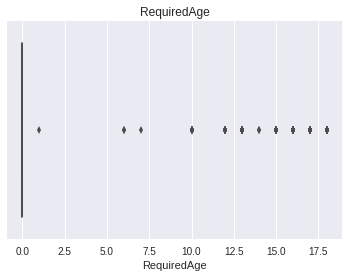

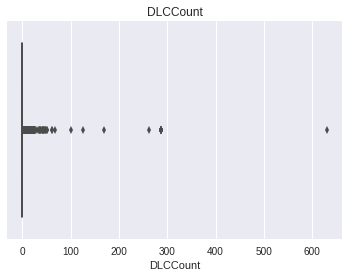

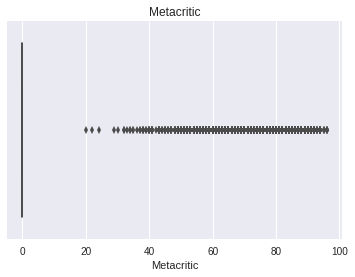

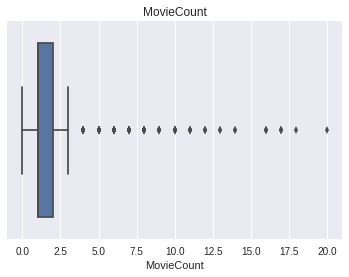

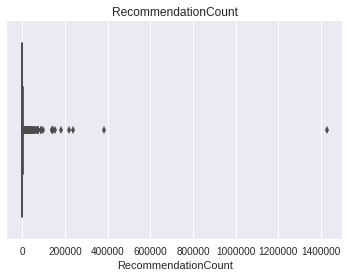

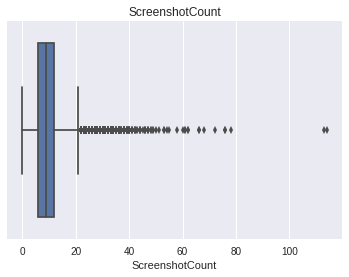

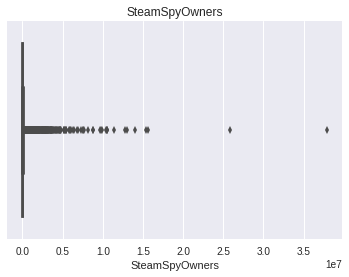

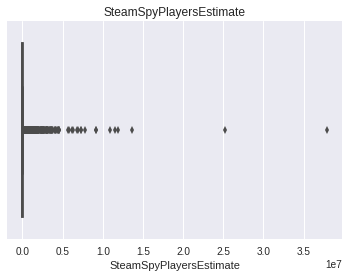

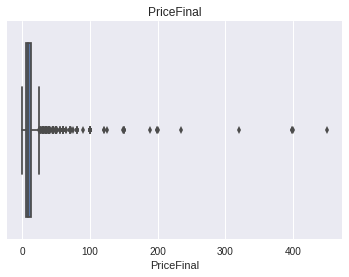

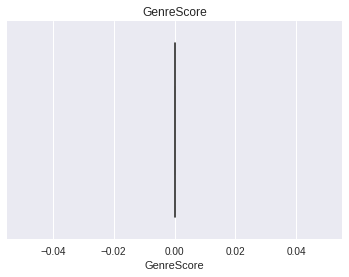

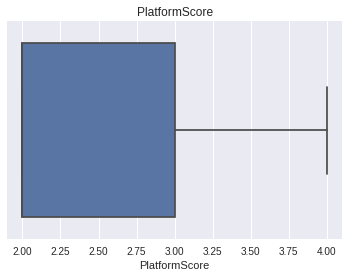

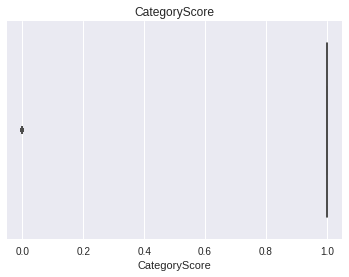

In [82]:
for column in steam_df.columns.drop(['ResponseName','ReleaseDate']):
    plt.figure()
    plt.title(column)
    sns.boxplot(pd.to_numeric(df[column]))

In [83]:
plt.close('all')

In [84]:
steam_df = steam_df.query('DLCCount < 600')
steam_df = steam_df.query('RecommendationCount < 1400000')
steam_df = steam_df.query('SteamSpyOwners < 90687580')
steam_df = steam_df.query('SteamSpyPlayersEstimate < 90687580')
steam_df = steam_df.query('PriceFinal < 300')

In [85]:
len(steam_df)

10820

In [86]:
steam_df.to_csv("steam_df.csv")